# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [2]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![image.png](attachment:image.png)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


In [ ]:
img1 = np.zeros((100, 100))
img1[:, 50:] = 1

In [ ]:
img2 = np.zeros((100, 100))
img2[50:, :] = 1

In [ ]:
img3 = np.zeros((100, 100))
img3[:50, :50] = 1

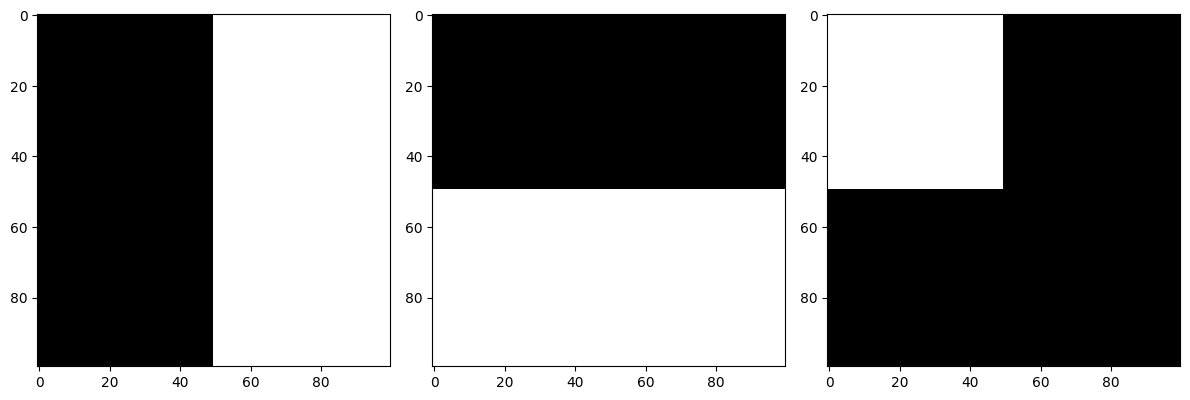

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(img1, cmap='gray')
axes[1].imshow(img2, cmap='gray')
axes[2].imshow(img3, cmap='gray')

plt.tight_layout()
plt.show()

*   Use the above three images to create the following image

![image-2.png](attachment:image-2.png)
*Hint: Remember channels and color spaces*

In [ ]:
img_color = np.zeros((100, 100, 3))

img_color[:, :, 0] = img1
img_color[:, :, 1] = img2
img_color[:, :, 2] = img3

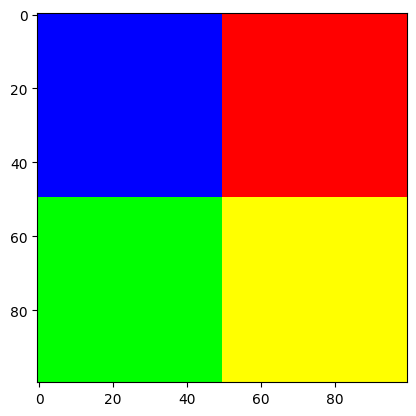

In [ ]:
plt.imshow(img_color)
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![image.png](attachment:image.png)

*   Extract individual channels and plot them using matplotlib subplot.



In [6]:
from PIL import Image
img = Image.open('sillas.jpg')

img_array = np.array(img)
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

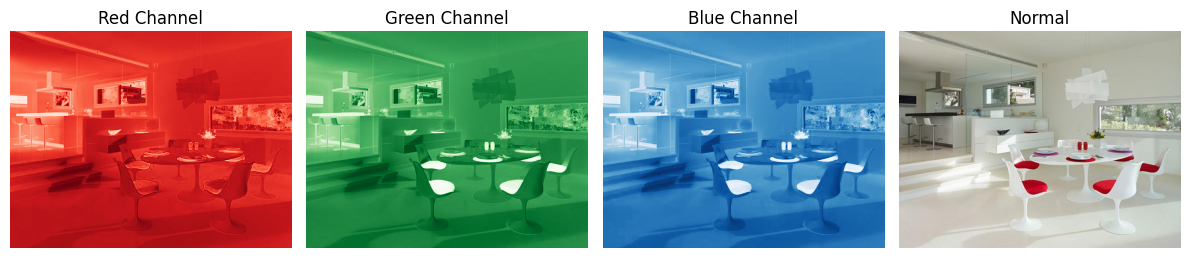

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title("Red Channel")
axes[0].axis('off')

axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title("Green Channel")
axes[1].axis('off')

axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title("Blue Channel")
axes[2].axis('off')

axes[3].imshow(img)
axes[3].set_title("Normal")
axes[3].axis('off')

plt.tight_layout()
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

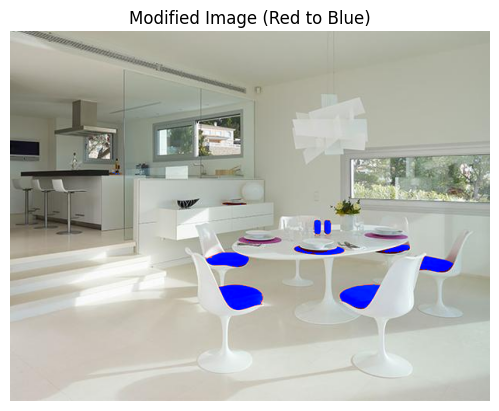

In [18]:
new_img_array = img_array.copy()

red_threshold = 100
red_regions = (new_img_array[:, :, 0] > red_threshold) & (new_img_array[:, :, 1] < 80) & (new_img_array[:, :, 2] < 80)

new_img_array[red_regions, 0] = 0
new_img_array[red_regions, 2] = 255


plt.imshow(new_img_array)
plt.title("Modified Image (Red to Blue)")
plt.axis('off')
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![image.png](attachment:image.png)

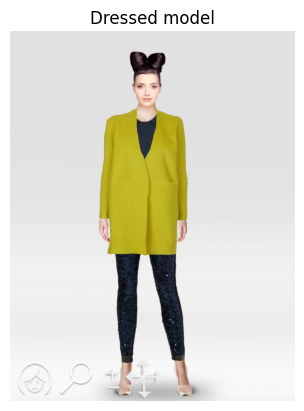

In [20]:
img1 = io.imread('model.png')
img2 = io.imread('coat.png')

superimposed_img = img1.copy()

mask = img2 > 0

superimposed_img[mask] = img2[mask]

plt.imshow(superimposed_img)
plt.title("Dressed model")
plt.axis('off')
plt.show()

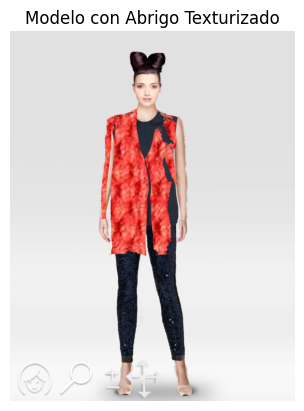

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

texture_img = Image.open('texture2.png')

model_array = np.array(img1)
coat_array = np.array(img2)
texture_array = np.array(texture_img)

texture_resized = Image.fromarray(texture_array).resize((coat_array.shape[1], coat_array.shape[0]))
texture_resized_array = np.array(texture_resized)

mask = (coat_array[:, :, 0] > 180) & (coat_array[:, :, 1] > 160) & (coat_array[:, :, 2] < 100)

textured_coat = coat_array.copy()
for c in range(3):
    textured_coat[mask, c] = texture_resized_array[mask, c]

final_image = model_array.copy()
for c in range(3):
    final_image[mask, c] = textured_coat[mask, c]

plt.imshow(final_image)
plt.title("Modelo con Abrigo Texturizado")
plt.axis('off')
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




In [ ]:
# solution



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

In [ ]:
# solution





*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?

